In [1]:
# import ijson

# # Assume you have a JSON file named 'example.json'
# with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\data\\inaturalist\\val_mini_sample.json", 'r') as f:
#     # Create an iterator for parsing the JSON file
#     parser = ijson.items(f, 'item')

#     # Iterate through each item in the JSON array
#     for item in parser:
#         print(item)


In [2]:
import json

# Create training data
with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\Image\\inaturalist\\train_mini_sample.json", 'r') as file:
    # Load JSON data from the file
    train_ann = json.load(file)

# Validating data
with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\Image\\inaturalist\\val_mini_sample.json", 'r') as file:
    # Load JSON data from the file
    val_ann = json.load(file)

# Testing data
with open("C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\Image\\inaturalist\\test_mini_sample.json", 'r') as file:
    # Load JSON data from the file
    test_ann = json.load(file)


In [3]:
print(len(train_ann['images']), len(val_ann['images']), len(test_ann['images']))

40000 10000 10000


### **Create training/validating/testing sets using dictionaries**

In [1]:
%pip install Pillow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

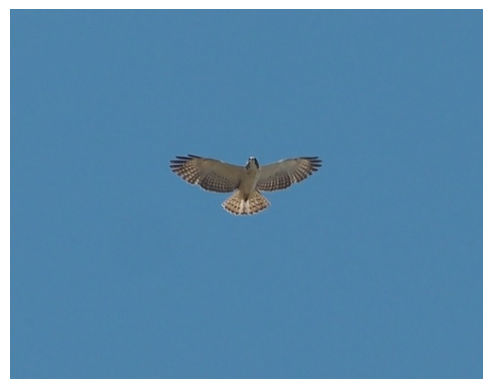

In [5]:
# Specify the path to your image file
image_path = "C:\\Users\\KurtJi\\OneDrive - University of Illinois - Urbana\\Desktop\\Personal Projects\\Image\\inaturalist\\train_mini\\03125_Animalia_Chordata_Aves_Accipitriformes_Accipitridae_Buteo_brachyurus\\63b0e206-2cd8-40c0-87c2-a721c9fc45e4.jpg"  # Replace with the actual path

# Read the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [6]:
import numpy as np
import pandas as pd

In [99]:
test_ann['images']

[{'id': 397077,
  'width': 500,
  'height': 375,
  'file_name': 'train_mini/06182_Plantae_Tracheophyta_Liliopsida_Liliales_Liliaceae_Prosartes_hookeri/4a5134da-0bb5-41b7-b705-f20d5b1bcd5e.jpg',
  'license': 1,
  'rights_holder': 'cgluck',
  'date': '2017-03-29 20:08:00+00:00',
  'latitude': 37.93691,
  'longitude': -122.56091,
  'location_uncertainty': 191},
 {'id': 930458,
  'width': 500,
  'height': 316,
  'file_name': 'train_mini/00066_Animalia_Arthropoda_Arachnida_Araneae_Pisauridae_Dolomedes_albineus/1971844d-5e6f-420b-ad75-52f746d3ac93.jpg',
  'license': 1,
  'rights_holder': 'Amber Hart',
  'date': '2017-03-02 01:56:00+00:00',
  'latitude': 34.62786,
  'longitude': -86.27443,
  'location_uncertainty': 3001},
 {'id': 2600672,
  'width': 500,
  'height': 333,
  'file_name': 'train_mini/07370_Plantae_Tracheophyta_Magnoliopsida_Caryophyllales_Cactaceae_Echinocereus_santaritensis/e95cd1ff-3ebd-4764-b7dd-97f2168208f1.jpg',
  'license': 1,
  'rights_holder': 'radinis',
  'date': '2019-

In [100]:
test_ann['categories']

[[{'id': 0,
   'name': 'Lumbricus terrestris',
   'common_name': 'Common Earthworm',
   'supercategory': 'Animalia',
   'kingdom': 'Animalia',
   'phylum': 'Annelida',
   'class': 'Clitellata',
   'order': 'Haplotaxida',
   'family': 'Lumbricidae',
   'genus': 'Lumbricus',
   'specific_epithet': 'terrestris',
   'image_dir_name': '00000_Animalia_Annelida_Clitellata_Haplotaxida_Lumbricidae_Lumbricus_terrestris'},
  {'id': 1,
   'name': 'Sabella spallanzanii',
   'common_name': 'Mediterranean Fanworm',
   'supercategory': 'Animalia',
   'kingdom': 'Animalia',
   'phylum': 'Annelida',
   'class': 'Polychaeta',
   'order': 'Sabellida',
   'family': 'Sabellidae',
   'genus': 'Sabella',
   'specific_epithet': 'spallanzanii',
   'image_dir_name': '00001_Animalia_Annelida_Polychaeta_Sabellida_Sabellidae_Sabella_spallanzanii'},
  {'id': 2,
   'name': 'Serpula columbiana',
   'common_name': 'Serpula columbiana',
   'supercategory': 'Animalia',
   'kingdom': 'Animalia',
   'phylum': 'Annelida',
 

In [101]:
train_ann['categories'][0]

[{'id': 0,
  'name': 'Lumbricus terrestris',
  'common_name': 'Common Earthworm',
  'supercategory': 'Animalia',
  'kingdom': 'Animalia',
  'phylum': 'Annelida',
  'class': 'Clitellata',
  'order': 'Haplotaxida',
  'family': 'Lumbricidae',
  'genus': 'Lumbricus',
  'specific_epithet': 'terrestris',
  'image_dir_name': '00000_Animalia_Annelida_Clitellata_Haplotaxida_Lumbricidae_Lumbricus_terrestris'},
 {'id': 1,
  'name': 'Sabella spallanzanii',
  'common_name': 'Mediterranean Fanworm',
  'supercategory': 'Animalia',
  'kingdom': 'Animalia',
  'phylum': 'Annelida',
  'class': 'Polychaeta',
  'order': 'Sabellida',
  'family': 'Sabellidae',
  'genus': 'Sabella',
  'specific_epithet': 'spallanzanii',
  'image_dir_name': '00001_Animalia_Annelida_Polychaeta_Sabellida_Sabellidae_Sabella_spallanzanii'},
 {'id': 2,
  'name': 'Serpula columbiana',
  'common_name': 'Serpula columbiana',
  'supercategory': 'Animalia',
  'kingdom': 'Animalia',
  'phylum': 'Annelida',
  'class': 'Polychaeta',
  'ord

##### **Load Training data**

In [111]:
train_ann['images'][0]

{'id': 789857,
 'width': 500,
 'height': 302,
 'file_name': 'train_mini/03198_Animalia_Chordata_Aves_Anseriformes_Anatidae_Anas_fulvigula/e706c2be-c819-4c81-bb34-d1f895eb7dec.jpg',
 'license': 1,
 'rights_holder': 'Jeff McIntyre',
 'date': '2018-04-21 22:01:00+00:00',
 'latitude': 27.83488,
 'longitude': -97.07262,
 'location_uncertainty': 31}

In [112]:
train_ann['annotations'][0]

{'id': 789857, 'image_id': 789857, 'category_id': 3198}

##### **Load Training Data**

In [7]:
train_data = {}

for i in range(len(train_ann['images'])):
    # read image
    image_path = "inaturalist/" + train_ann['images'][i]['file_name']
    if train_ann['images'][i]['file_name'].startswith("train_mini/05212"):
        continue
    image_pil = Image.open(image_path)
    image_np = np.array(image_pil)

    # fetch image information
    # fetch date
    image_date = train_ann['images'][i]['date']
    # fetch location
    image_loc = [train_ann['images'][i]['latitude'], train_ann['images'][i]['longitude']]
    # fetch image size
    image_size = [train_ann['images'][i]['width'], train_ann['images'][i]['height']]
    
    # fetch categories
    image_id = train_ann['images'][i]['id']
    # check conditions
    if train_ann['annotations'][i]['image_id'] != image_id:
        print('id not match')
        break
    category_id = train_ann['annotations'][i]['category_id']
    category = train_ann['categories'][0][category_id]

    # assign values
    train_data[i] = {'image': image_np, 'image_id': image_id, 'image_date': image_date, 'image_loc': image_loc, 'image_size': image_size, 'image_category': category}    

In [74]:
np.shape(train_data[4]['image'])

(500, 375, 3)

In [ ]:
plt.imshow(train_data[33]['image'])

##### **Load Validation data**

In [8]:
val_data = {}

for i in range(len(val_ann['images'])):
    # read image
    image_path = "inaturalist/" + val_ann['images'][i]['file_name']
    if val_ann['images'][i]['file_name'].startswith("val_mini/05212"):
        continue
    image_pil = Image.open(image_path)
    image_np = np.array(image_pil)

    # fetch image information
    # fetch date
    image_date = val_ann['images'][i]['date']
    # fetch location
    image_loc = [val_ann['images'][i]['latitude'], val_ann['images'][i]['longitude']]
    # fetch image size
    image_size = [val_ann['images'][i]['width'], val_ann['images'][i]['height']]
    
    # fetch categories
    image_id = val_ann['images'][i]['id']
    # check conditions
    if val_ann['annotations'][i]['image_id'] != image_id:
        print('id not match')
        break
    category_id = val_ann['annotations'][i]['category_id']
    category = val_ann['categories'][0][category_id]

    # assign values
    val_data[i] = {'image': image_np, 'image_id': image_id, 'image_date': image_date, 'image_loc': image_loc, 'image_size': image_size, 'image_category': category}    

In [ ]:
plt.imshow(val_data[88]['image'])

In [118]:
test_ann

{'images': [{'id': 2112671,
   'width': 375,
   'height': 500,
   'file_name': 'train_mini/02623_Animalia_Arthropoda_Insecta_Orthoptera_Acrididae_Omocestus_rufipes/3be435a8-2322-49cb-a1d5-c25e5f392e09.jpg',
   'license': 1,
   'rights_holder': 'gloria_ramello',
   'date': '2019-08-03 16:34:31+00:00',
   'latitude': 45.57247,
   'longitude': 8.27238,
   'location_uncertainty': None},
  {'id': 1100109,
   'width': 375,
   'height': 500,
   'file_name': 'train_mini/02649_Animalia_Arthropoda_Insecta_Orthoptera_Gryllidae_Hapithus_saltator/9484789f-4889-4629-8189-43ea7317d078.jpg',
   'license': 1,
   'rights_holder': 'theredhead15',
   'date': '2018-09-06 14:11:11+00:00',
   'latitude': 40.73562,
   'longitude': -74.4285,
   'location_uncertainty': 27908},
  {'id': 1383738,
   'width': 375,
   'height': 500,
   'file_name': 'train_mini/01020_Animalia_Arthropoda_Insecta_Lepidoptera_Erebidae_Dasychira_chekiangensis/34c1ac21-3bbc-4598-8153-98d121d9ebd0.jpg',
   'license': 1,
   'rights_holder'

##### **Load Testing Data**

In [9]:
test_data = {}

for i in range(len(test_ann['images'])):
    # read image
    image_path = "inaturalist/" + test_ann['images'][i]['file_name']
    if test_ann['images'][i]['file_name'].startswith("train_mini/05212"):
        continue
    image_pil = Image.open(image_path)
    image_np = np.array(image_pil)

    # fetch image information
    # fetch date
    image_date = test_ann['images'][i]['date']
    # fetch location
    image_loc = [test_ann['images'][i]['latitude'], test_ann['images'][i]['longitude']]
    # fetch image size
    image_size = [test_ann['images'][i]['width'], test_ann['images'][i]['height']]
    
    # fetch categories
    image_id = test_ann['images'][i]['id']
    # check conditions
    if test_ann['annotations'][i]['image_id'] != image_id:
        print('id not match')
        break
    category_id = test_ann['annotations'][i]['category_id']
    category = test_ann['categories'][0][category_id]

    # assign values
    test_data[i] = {'image': image_np, 'image_id': image_id, 'image_date': image_date, 'image_loc': image_loc, 'image_size': image_size, 'image_category': category}    

In [11]:
print(len(train_data), len(val_data), len(test_data))

39997 10000 9998


In [20]:
for i in range(len(train_data)):
    if i in train_data:
        with open(f'data/train_data/{i}.npy', 'wb') as f:
            np.save(f, train_data[i])


In [21]:
for i in range(len(val_data)):
    if i in val_data:
        with open(f'data/val_data/{i}.npy', 'wb') as f:
            np.save(f, val_data[i])

In [22]:
for i in range(len(test_data)):
    if i in test_data:
        with open(f'data/test_data/{i}.npy', 'wb') as f:
            np.save(f, test_data[i])